In [1]:
import numpy as np
from numpy.polynomial import Polynomial

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sys
sys.path.insert(1, "../")

from modules.pcm_management import *
from modules.code_generation import *

codes_path = "../codes/"

### This notebook demonstrates how to generate hypergraph product (HP) codes.

We start with the [[129, 28]] HP code, constructed from two BCH codes.

In [2]:
n1 = 7
k1 = 4
m1 = n1 - k1

n2 = 15
k2 = 7
m2 = n2 - k2

The function *bch_pcm* generates the PCM matrix of a BCH code. Note that the generator polynomial is provided as a tring in an octal representation (e.g. "13" translates to 001 011).

In [3]:
H1 = bch_pcm(n1, k1, "13") # [7, 4] code
H2 = bch_pcm(n2, k2, "721") # [15, 7] code

Text(0.5, 1.0, 'H_2')

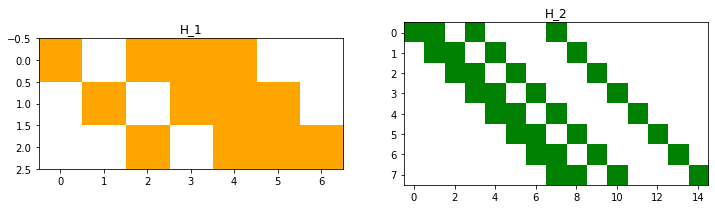

In [4]:
plt.figure(figsize = (12, 5))
cmap = ListedColormap(["white", "orange", "green"])

plt.subplot(121)
plt.imshow(H1, cmap = cmap, vmin = 0, vmax = 2)
plt.title("H_1")

plt.subplot(122)
plt.imshow(2 * H2, cmap = cmap, vmin = 0, vmax = 2)
plt.title("H_2")

The definition of the HP code construction can be found on p. 26 in the thesis.

In [5]:
Hx_CSS = np.hstack((np.kron(H1, np.eye(n2, dtype = np.uint8)), np.kron(np.eye(m1, dtype = np.uint8), H2.T)))
Hz_CSS = np.hstack((np.kron(np.eye(n1, dtype = np.uint8), H2), np.kron(H1.T, np.eye(m2, dtype = np.uint8))))

The *QuantumCode* class can be used to write the code defined by Hx_CSS and Hz_CSS to a binary ALIST file.

In [6]:
file_name = "hp_129_28.alist"
qcode = QuantumCode()
qcode.write_CSS_to_alist(Hx_CSS, Hz_CSS, codes_path + file_name)

Several representations of the quantum code can be accessed via the *QuantumClass*. When the method *write_CSS_to_alist* is called, the matrices Hx_CSS and Hz_CSS are converted to both, the quaternary representation (accessible via qcode.H) and the binary representation (accessible via qcode.Hbin).

For a detailed description of the implementation of computations over GF(4) using the galois package, see the notebook *computations_over_gf4*.

Text(0.5, 1.0, 'PCM of [[900, 36]] HP code')

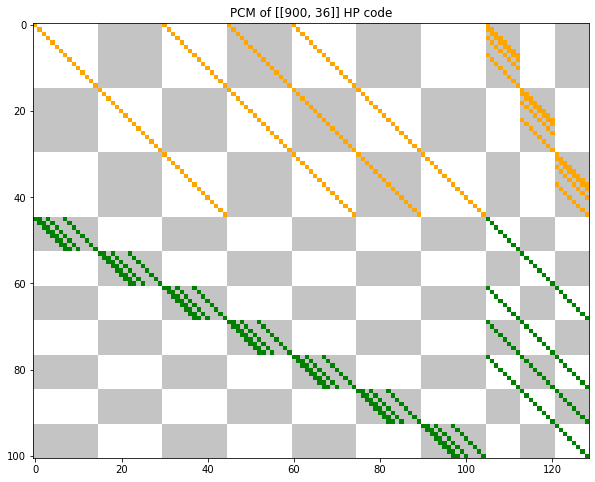

In [7]:
plt.figure(figsize = (12, 8))

# the function matr_chessboard is defined in utils and simply enables us to plot a checkboard pattern to enhance readability
grid = np.vstack((np.hstack((matr_chessboard(n2, n2, m1, n1, top_left = 1),
                             matr_chessboard(n2, m2, m1, m1, top_left = 0))), 
                  np.hstack((matr_chessboard(m2, n2, n1, n1, top_left = 0), 
                             matr_chessboard(m2, m2, n1, m1, top_left = 1)))))
H_sel = qcode.H

cmap = ListedColormap(["#c4c4c4", "white", "blue", "orange", "green"])
plt.imshow(np.where(H_sel == 0, grid - 2.0, H_sel), cmap = cmap, vmin = -2, vmax = 2)

plt.title("PCM of [[900, 36]] HP code")

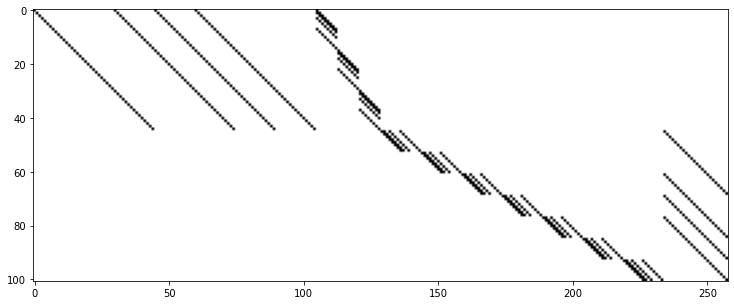

In [8]:
plt.figure(figsize = (15, 5))
plt.imshow(1 - qcode.Hbin, cmap = "gray")

# Symmetric HP codes

Symmetric HP codes used in the thesis are generated from regular LDPC codes with $d_v = 3$ and $d_c = 4$. For this notebook, we use $n=24$ and $m=18$, resulting in a [[900, 36]] HP code.

In [9]:
# define parameters of the LDPC code

n = 24
m = 18

dv = 3
dc = int(n/m * dv)

The function *generate_regular_4cycle_free_PCM* calls the function *generate_regular_PCM* and subsequently removes cycles of length four. Since this may fail due to a random code construction, the function attempts to generate such a PCM until a valid PCM is found and only returns a matrix H when it succeeded.

In [ ]:
H = generate_regular_4cycle_free_PCM(m, n, dv)

In [ ]:
Hx_CSS = np.hstack((np.kron(H, np.eye(n, dtype = np.uint8)), np.kron(np.eye(m, dtype = np.uint8), H.T)))
Hz_CSS = np.hstack((np.kron(np.eye(n, dtype = np.uint8), H), np.kron(H.T, np.eye(m, dtype = np.uint8))))

In [ ]:
qcode = QuantumCode()
code_name = "hp_900_36"
qcode.write_CSS_to_alist(Hx_CSS, Hz_CSS, codes_path + code_name + ".alist")